In [1]:
#!pip install pysentimiento==0.7.2

In [11]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")


2023-12-08 08:44:02.340322: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
analyzer.predict("Qué olor a mandarina")

AnalyzerOutput(output=NEG, probas={NEG: 0.740, NEU: 0.174, POS: 0.087})

In [13]:
#Hate Speech (territorialidad)

hate_speech_analyzer = create_analyzer(task="hate_speech", lang="es")

In [6]:
hate_speech_analyzer.predict('pienso injusta ment marrueco quier')

AnalyzerOutput(output=[], probas={hateful: 0.129, targeted: 0.008, aggressive: 0.061})

In [7]:
analyzer.predict('pienso injusta ment marrueco quier')

AnalyzerOutput(output=NEU, probas={NEU: 0.530, NEG: 0.435, POS: 0.034})

In [2]:
import pandas as pd
df = pd.read_csv('/Users/usuario/Downloads/irunela/csv/comentarios_territorio_procesado.csv')

In [9]:
df['comment_stem'][0]

'puedo creer verdad espa cedido islot perejil marrueco eeeeeee'

In [10]:
def asignar_valor(elemento):
    if isinstance(elemento, str):
        resultado = analyzer.predict(elemento)
        if resultado.output == 'NEG':
            return -1
        elif resultado.output == 'NEU':
            return 0
        elif resultado.output == 'POS':
            return 1
        else:
            print(f"Output de sentimiento desconocido: {resultado.output}")
            return None  # Manejar otros casos si es necesario

# Aplicar la función a la columna 'comment_stem' y crear una nueva columna 'valor_asignado'
df['sentiment'] = df['comment_stem'].apply(lambda x: asignar_valor(x))

# Mostrar el DataFrame con la nueva columna


In [11]:
df.head()

,Unnamed: 0,video_id,author,comment,comment_stem,vectores_tfidf,sentiment
0,0,AsMZK3aGFHs,UCdKDIaqBUVeHnZPu_ZxLhSw,No me lo puedo creer . De verdad España le ha ...,puedo creer verdad espa cedido islot perejil m...,[0. 0. 0. ... 0. 0. 0.],-1.0
1,1,AsMZK3aGFHs,UCPkFakCcbBKkwOXOxZM6s0g,Si... pero entre unos y otros ya se han encarg...,encargado destruirlo verdad humano conflictivo...,[0. 0. 0. ... 0. 0. 0.],-1.0
2,2,AsMZK3aGFHs,UCzQxKrGJNxaPv46W9qWIeBA,Tabarca te ha faltado,tabarca faltado,[0. 0. 0. ... 0. 0. 0.],0.0
3,3,AsMZK3aGFHs,UC4DFxGYtyWZnWwAopqTU2LA,El motivo fue que el asesino franco estaba muy...,motivo asesino franco ocupado robando espa,[0. 0. 0. ... 0. 0. 0.],-1.0
4,4,AsMZK3aGFHs,UCEMTJtx6dRCBbsRo0BC0aNg,Yo e tenido una duda \nPorque España no es una...,duda espa super potencia fuert unido despu rob...,[0. 0. 0. ... 0. 0. 0.],-1.0


In [12]:
df['sentiment'].value_counts()

 0.0    5858
-1.0    2707
 1.0    1375
Name: sentiment, dtype: int64

In [13]:
df[df['sentiment']==-1]

,Unnamed: 0,video_id,author,comment,comment_stem,vectores_tfidf,sentiment
0,0,AsMZK3aGFHs,UCdKDIaqBUVeHnZPu_ZxLhSw,No me lo puedo creer . De verdad España le ha ...,puedo creer verdad espa cedido islot perejil m...,[0. 0. 0. ... 0. 0. 0.],-1.0
1,1,AsMZK3aGFHs,UCPkFakCcbBKkwOXOxZM6s0g,Si... pero entre unos y otros ya se han encarg...,encargado destruirlo verdad humano conflictivo...,[0. 0. 0. ... 0. 0. 0.],-1.0
3,3,AsMZK3aGFHs,UC4DFxGYtyWZnWwAopqTU2LA,El motivo fue que el asesino franco estaba muy...,motivo asesino franco ocupado robando espa,[0. 0. 0. ... 0. 0. 0.],-1.0
4,4,AsMZK3aGFHs,UCEMTJtx6dRCBbsRo0BC0aNg,Yo e tenido una duda \nPorque España no es una...,duda espa super potencia fuert unido despu rob...,[0. 0. 0. ... 0. 0. 0.],-1.0
6,6,AsMZK3aGFHs,UCBa0PWeslUmIAsly31x9aZA,"Muito bem , a Espanha é um país muito lindo qu...",muito espanha muito lindo gosto muito espanhoi...,[0. 0. 0. ... 0. 0. 0.],-1.0
...,...,...,...,...,...,...,...
10274,10274,pl7fAOdUDUc,UCtMxHkD0C14WHpgSh0GrF5A,"No, perdón, nadie ha dicho que sea un deber. S...",perd nadi dicho deber entraron cometi delito f...,[0. 0. 0. ... 0. 0. 0.],-1.0
10280,10280,2tvaHaQv4rI,UCTUyfPKfwMDd8ORAlKxuNQg,"Es una verdadera pena., que esta danza bolivia...",verdadera pena danza boliviana imitador bail v...,[0. 0. 0. ... 0. 0. 0.],-1.0
10289,10289,2tvaHaQv4rI,UCxptVwqu39UBx_Wf-ClLk7g,Os politicis piram com tanta bunda a mostra,politici piram tanta bunda mostra,[0. 0. 0. ... 0. 0. 0.],-1.0
10303,10303,O2OYcNT8TQg,UCWIPWwVo4rynYJlrOC_lmMQ,Yo solo siento placer si fisionomía mi clitori...,solo siento placer fisionom clitori fuert dedo...,[0. 0. 0. ... 0. 0. 0.],-1.0


In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [15]:
def show_wordcloud(df, column_name):
    all_words = df[column_name].tolist()
    all_words_str = ' '.join([str(x) for x in all_words if str(x).lower()]) 

    # Define la fuente TrueType que quieres usar (asegúrate de que sea compatible)
    font_path = 'arial.ttf'
    
    # Resto de tu código para procesar el texto y generar la WordCloud...
    wordcloud = WordCloud(
        width=2000,
        height=1000,
        random_state=1,
        background_color='black',
        colormap='viridis',
        #font_path=font_path
    ).generate(all_words_str)
    
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

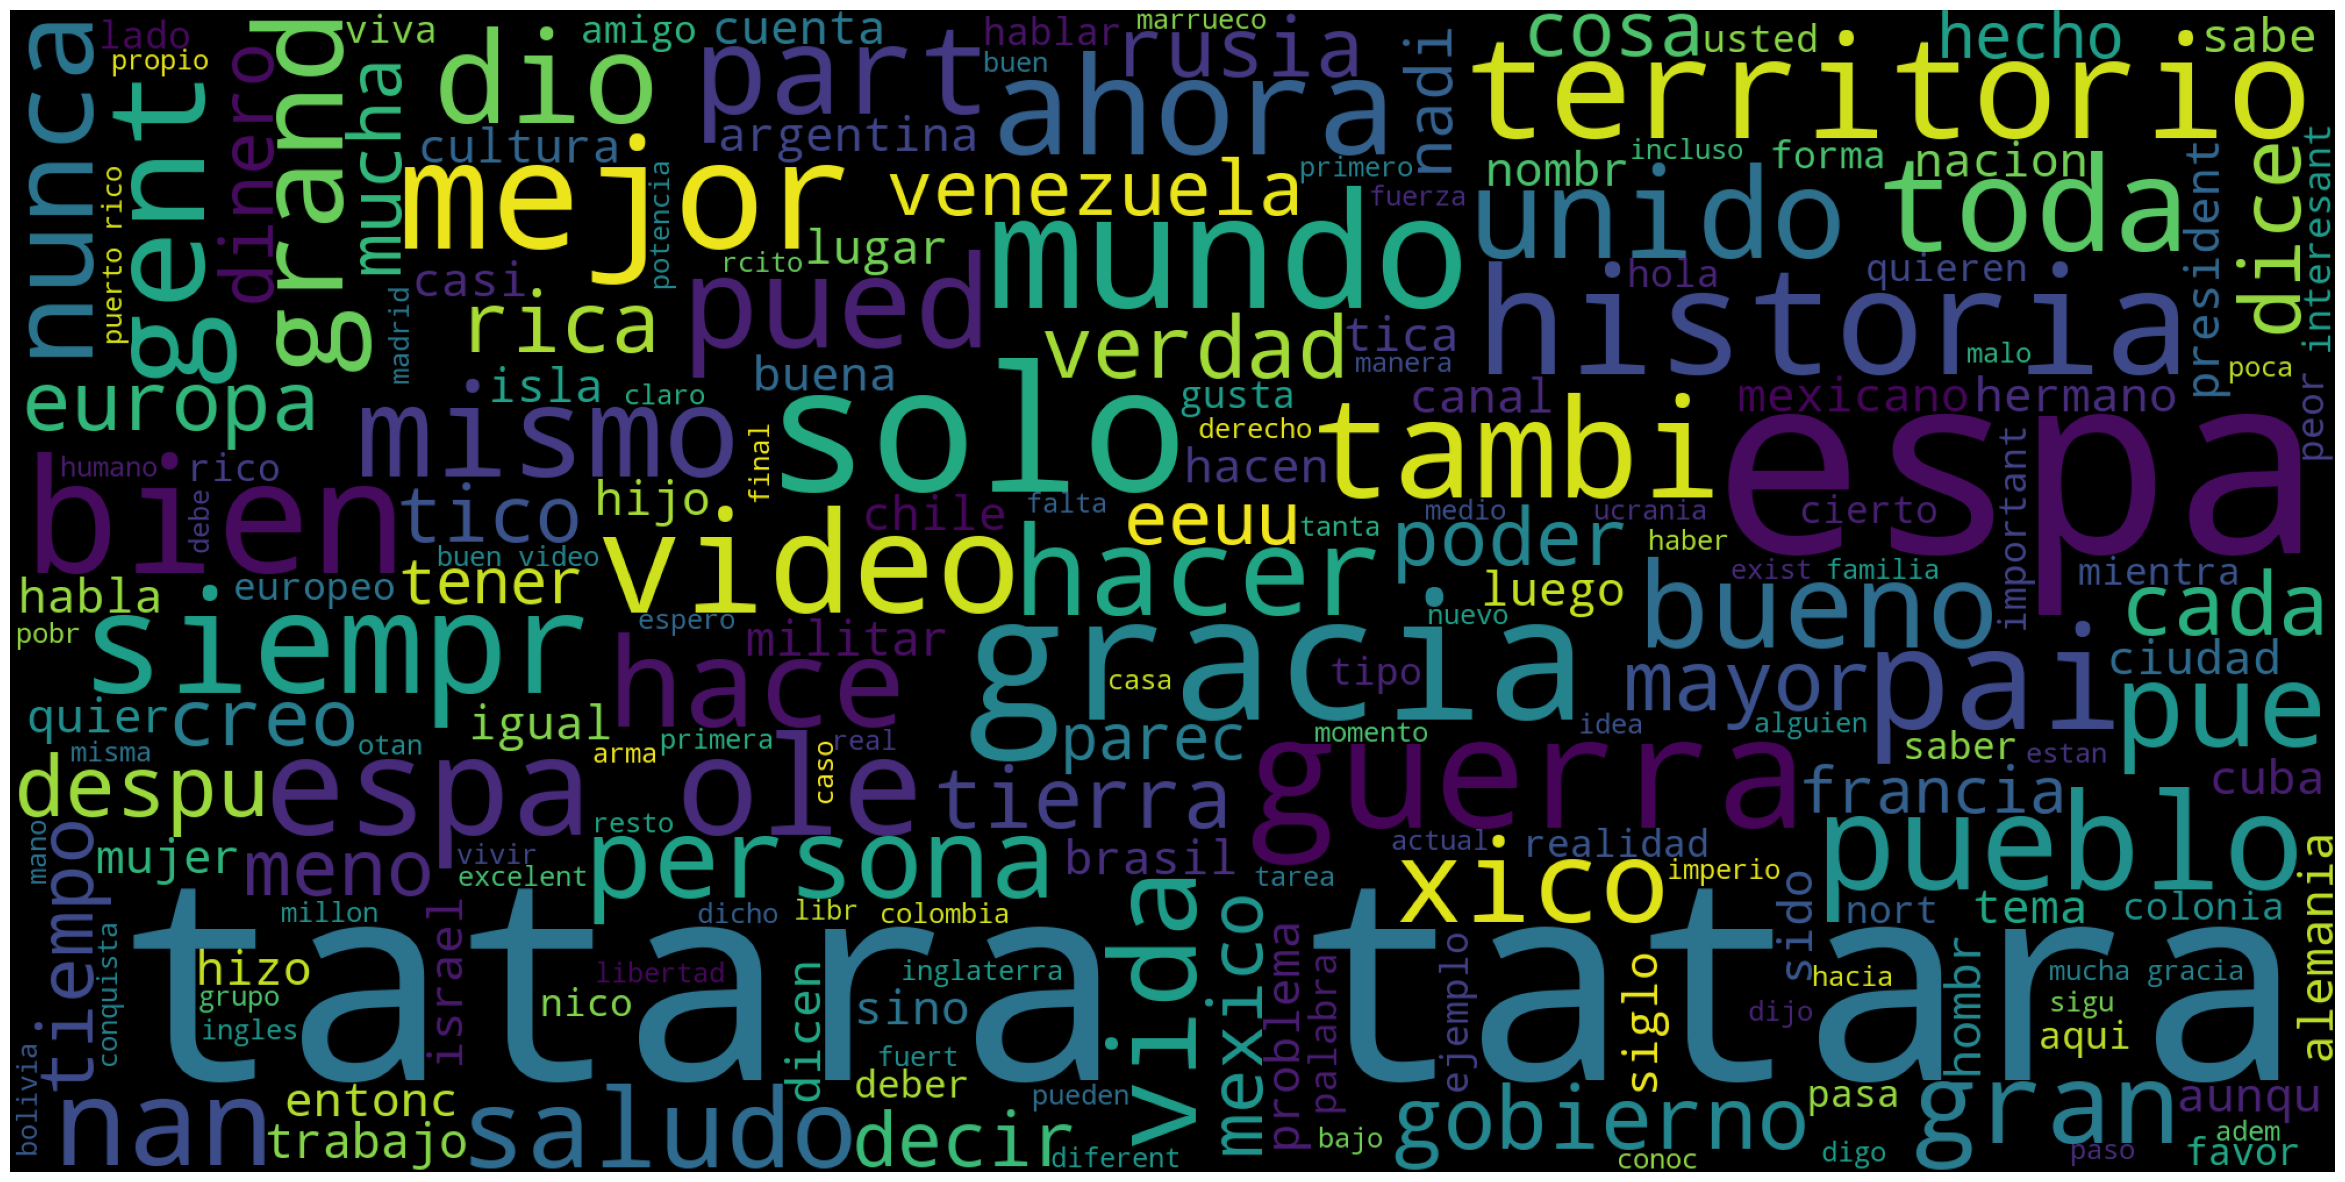

In [16]:
show_wordcloud(df,'comment_stem')

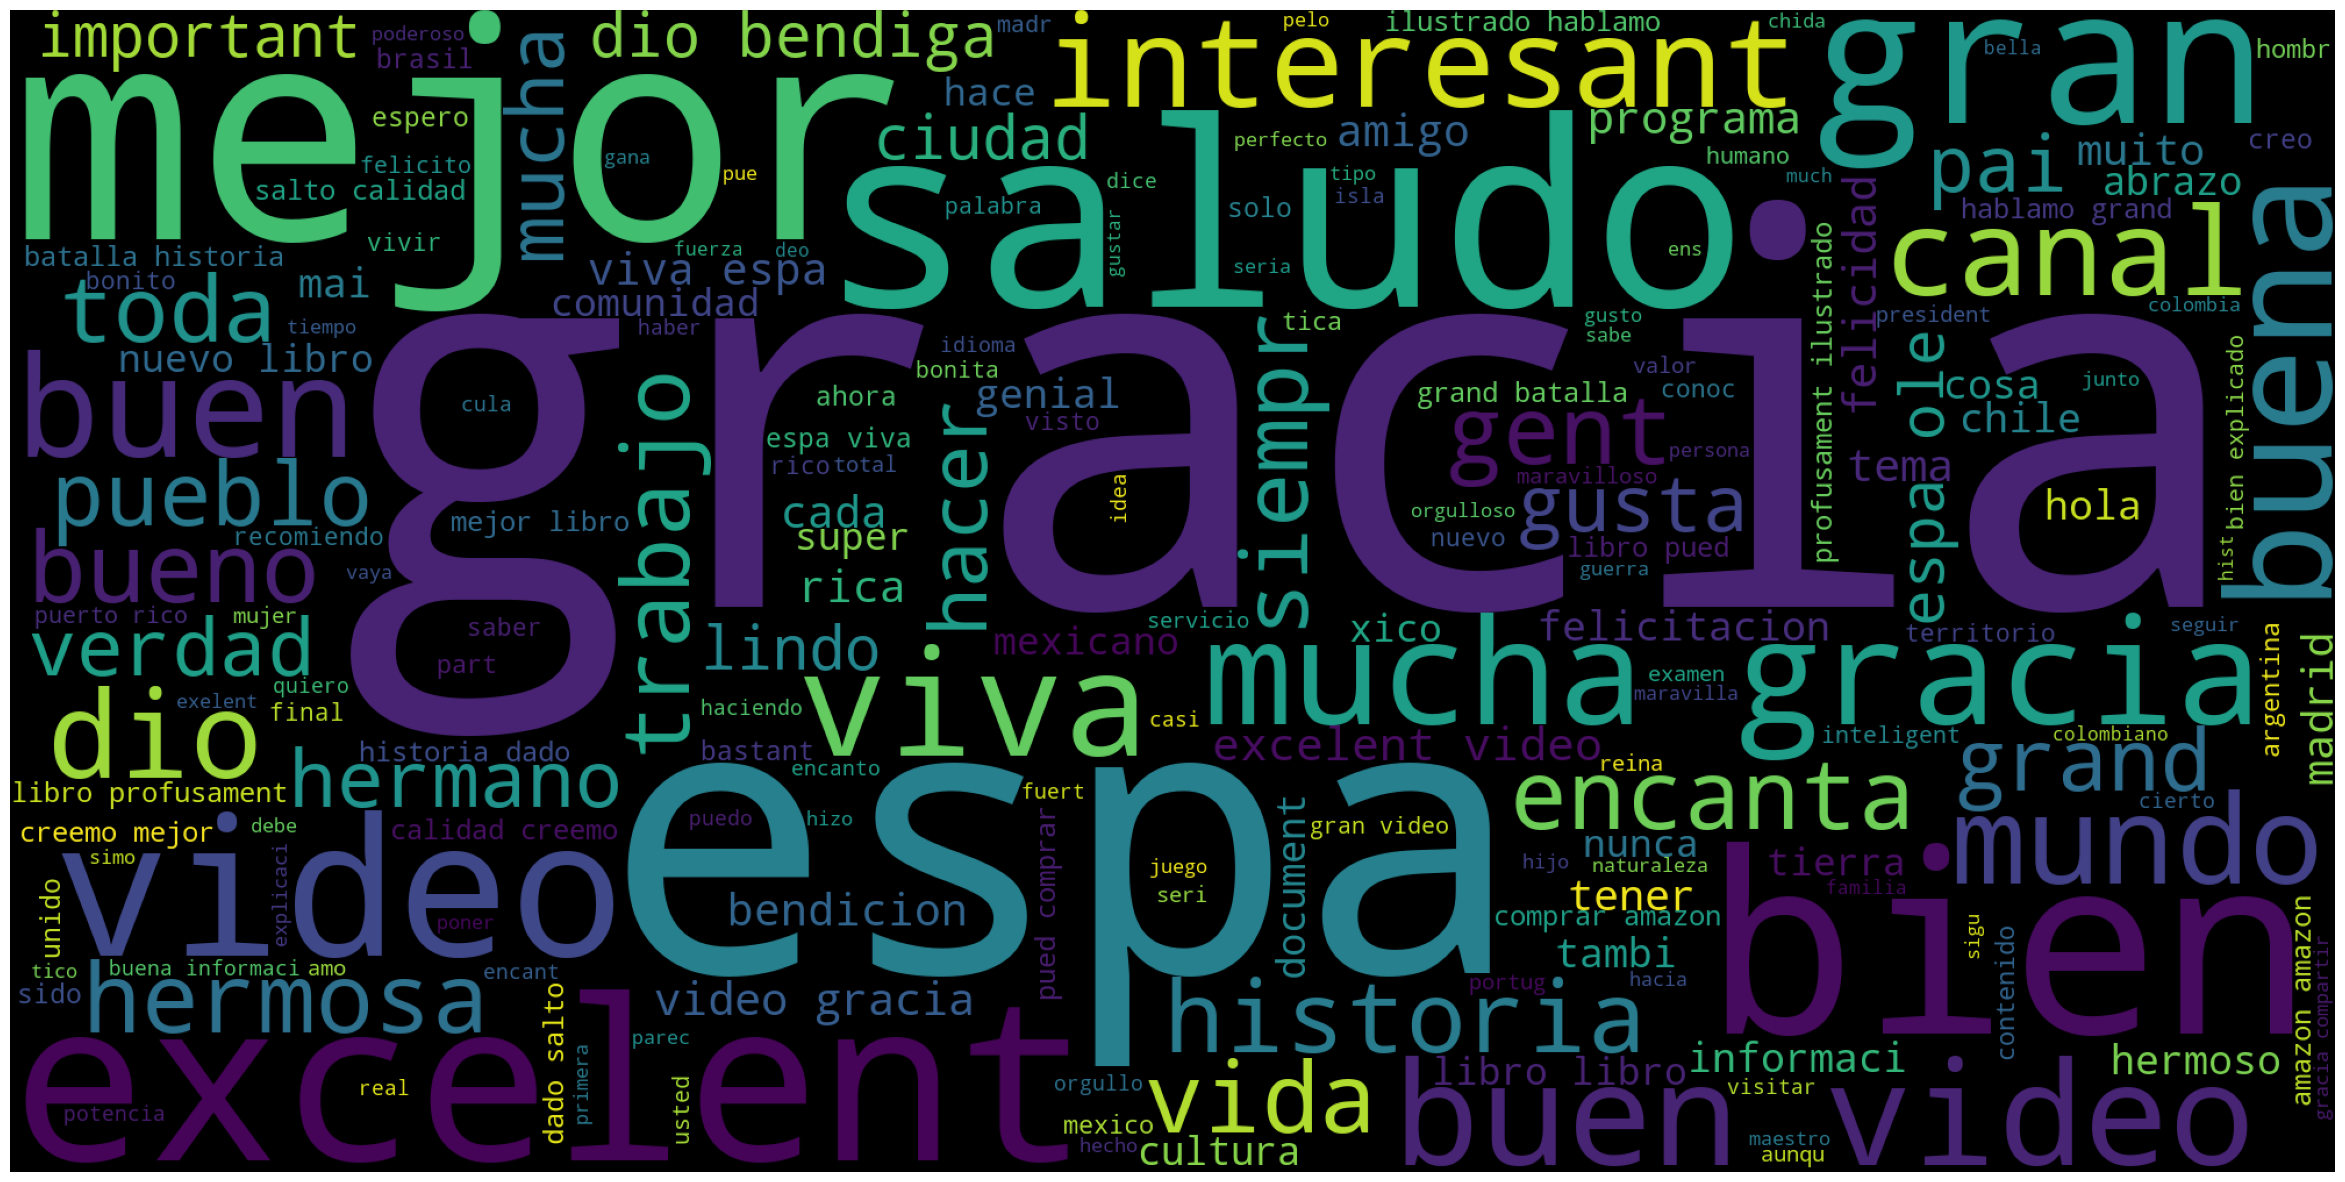

In [17]:
show_wordcloud(df[df['sentiment'] == 1], 'comment_stem')

In [18]:
df.to_csv('/Users/usuario/Downloads/irunela/csv/comentarios_territorio_sentimiento.csv')

In [19]:
# Filtrar las filas donde 'sentiment' es igual a -1
df_neg = df[df['sentiment'] == -1]

# Seleccionar las columnas específicas que quieres conservar en el nuevo dataset
columnas_deseadas = ['video_id', 'author', 'comment', 'vectores_tfidf', 'comment_stem', 'sentiment']
df_neg = df_neg[columnas_deseadas].copy()

df_neg.head()

,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
0,AsMZK3aGFHs,UCdKDIaqBUVeHnZPu_ZxLhSw,No me lo puedo creer . De verdad España le ha ...,[0. 0. 0. ... 0. 0. 0.],puedo creer verdad espa cedido islot perejil m...,-1.0
1,AsMZK3aGFHs,UCPkFakCcbBKkwOXOxZM6s0g,Si... pero entre unos y otros ya se han encarg...,[0. 0. 0. ... 0. 0. 0.],encargado destruirlo verdad humano conflictivo...,-1.0
3,AsMZK3aGFHs,UC4DFxGYtyWZnWwAopqTU2LA,El motivo fue que el asesino franco estaba muy...,[0. 0. 0. ... 0. 0. 0.],motivo asesino franco ocupado robando espa,-1.0
4,AsMZK3aGFHs,UCEMTJtx6dRCBbsRo0BC0aNg,Yo e tenido una duda \nPorque España no es una...,[0. 0. 0. ... 0. 0. 0.],duda espa super potencia fuert unido despu rob...,-1.0
6,AsMZK3aGFHs,UCBa0PWeslUmIAsly31x9aZA,"Muito bem , a Espanha é um país muito lindo qu...",[0. 0. 0. ... 0. 0. 0.],muito espanha muito lindo gosto muito espanhoi...,-1.0


In [20]:
df_neg.shape

(2707, 6)

In [21]:
df_neg.to_csv('/Users/usuario/Downloads/irunela/csv/comentarios_territorio_negativo.csv')

In [22]:
import pandas as pd

In [23]:
df_neg = pd.read_csv('/Users/usuario/Downloads/irunela/csv/comentarios_territorio_negativo.csv')

In [24]:
df_neg.shape

(2707, 7)

In [3]:
def hateful(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'hateful' está presente en las probabilidades
        if 'hateful' in resultado.probas:
            return resultado.probas['hateful']  # Devolver el valor de 'hateful'
        else:
            print(f"No se encontró 'hateful' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [26]:
df_neg['c_hateful'] = df_neg['comment_stem'].apply(lambda x: hateful(x))

In [27]:
df_neg['comment_stem'][2472]

'peor president mexico preocupa pais comunista dictador socialista nunca propio pai narcotrafico'

In [28]:
hate_speech_analyzer.predict('polic migraci dejan meter saben corren peligro')

AnalyzerOutput(output=[], probas={hateful: 0.397, targeted: 0.005, aggressive: 0.148})

In [4]:
def targeted(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'targeted' está presente en las probabilidades
        if 'targeted' in resultado.probas:
            return resultado.probas['targeted']  # Devolver el valor de 'targeted'
        else:
            print(f"No se encontró 'targeted' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [30]:
df_neg['targeted'] = df_neg['comment_stem'].apply(lambda x: targeted(x))

In [5]:
def aggresive(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'aggressive' está presente en las probabilidades
        if 'aggressive' in resultado.probas:
            return resultado.probas['aggressive']  # Devolver el valor de 'aggressive'
        else:
            print(f"No se encontró 'aggressive' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [32]:
df_neg['aggresive'] = df_neg['comment_stem'].apply(lambda x: aggresive(x))

In [33]:
df_neg.head()

,Unnamed: 0,video_id,author,comment,vectores_tfidf,comment_stem,sentiment,c_hateful,targeted,aggresive
0,0,AsMZK3aGFHs,UCdKDIaqBUVeHnZPu_ZxLhSw,No me lo puedo creer . De verdad España le ha ...,[0. 0. 0. ... 0. 0. 0.],puedo creer verdad espa cedido islot perejil m...,-1.0,0.046532,0.004801,0.020856
1,1,AsMZK3aGFHs,UCPkFakCcbBKkwOXOxZM6s0g,Si... pero entre unos y otros ya se han encarg...,[0. 0. 0. ... 0. 0. 0.],encargado destruirlo verdad humano conflictivo...,-1.0,0.077142,0.017215,0.042949
2,3,AsMZK3aGFHs,UC4DFxGYtyWZnWwAopqTU2LA,El motivo fue que el asesino franco estaba muy...,[0. 0. 0. ... 0. 0. 0.],motivo asesino franco ocupado robando espa,-1.0,0.049078,0.022993,0.051507
3,4,AsMZK3aGFHs,UCEMTJtx6dRCBbsRo0BC0aNg,Yo e tenido una duda \nPorque España no es una...,[0. 0. 0. ... 0. 0. 0.],duda espa super potencia fuert unido despu rob...,-1.0,0.139465,0.012405,0.050231
4,6,AsMZK3aGFHs,UCBa0PWeslUmIAsly31x9aZA,"Muito bem , a Espanha é um país muito lindo qu...",[0. 0. 0. ... 0. 0. 0.],muito espanha muito lindo gosto muito espanhoi...,-1.0,0.133591,0.012540,0.070859


In [34]:
df_neg.aggresive

0       0.020856
1       0.042949
2       0.051507
3       0.050231
4       0.070859
          ...   
2702    0.024910
2703    0.035227
2704    0.315039
2705    0.015074
2706    0.011897
Name: aggresive, Length: 2707, dtype: float64

In [35]:
import matplotlib.pyplot as plt

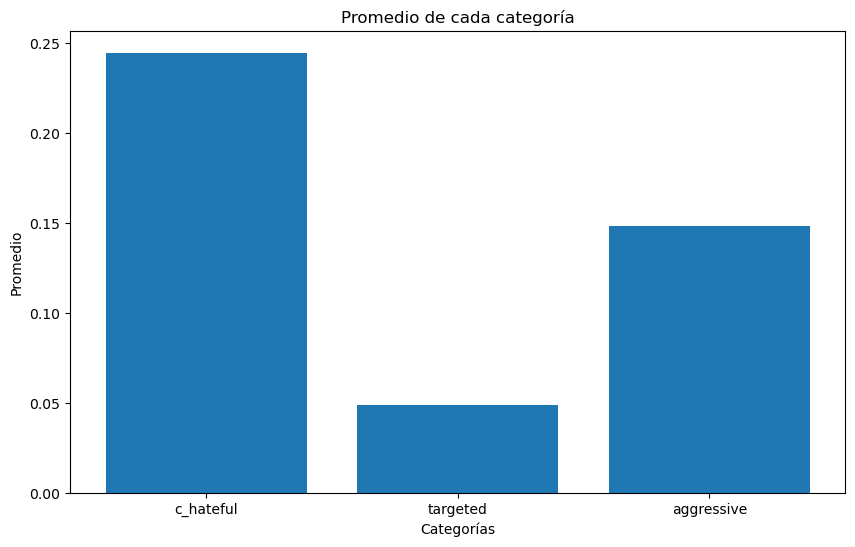

In [36]:
c_hateful = df_neg['c_hateful']
targeted = df_neg['targeted']
aggresive = df_neg['aggresive']

plt.figure(figsize=(10, 6))

plt.bar(['c_hateful', 'targeted', 'aggressive'], [c_hateful.mean(), targeted.mean(), aggresive.mean()])
plt.xlabel('Categorías')
plt.ylabel('Promedio')
plt.title('Promedio de cada categoría')

plt.show()



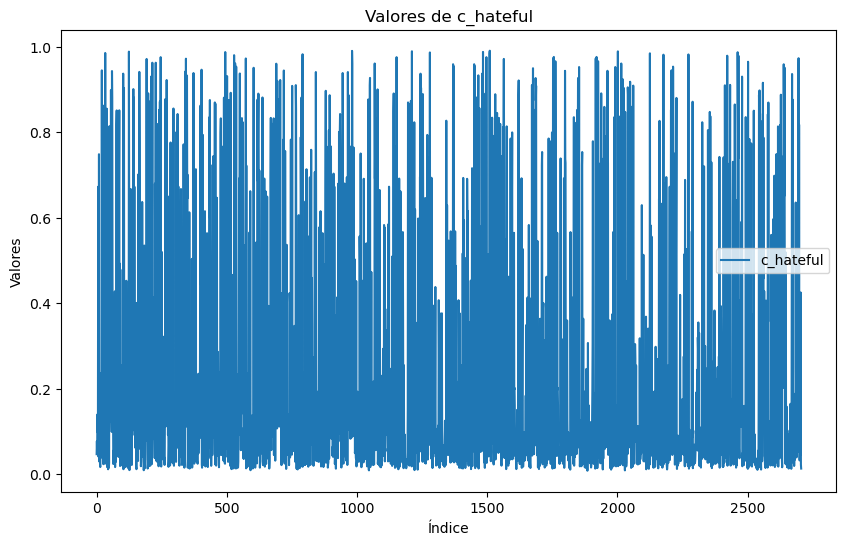

In [37]:
plt.figure(figsize=(10, 6))

plt.plot(df_neg['c_hateful'], label='c_hateful')
# plt.plot(df_neg['targeted'], label='targeted')
# plt.plot(df_neg['aggresive'], label='aggresive')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Valores de c_hateful')
plt.legend()

plt.show()

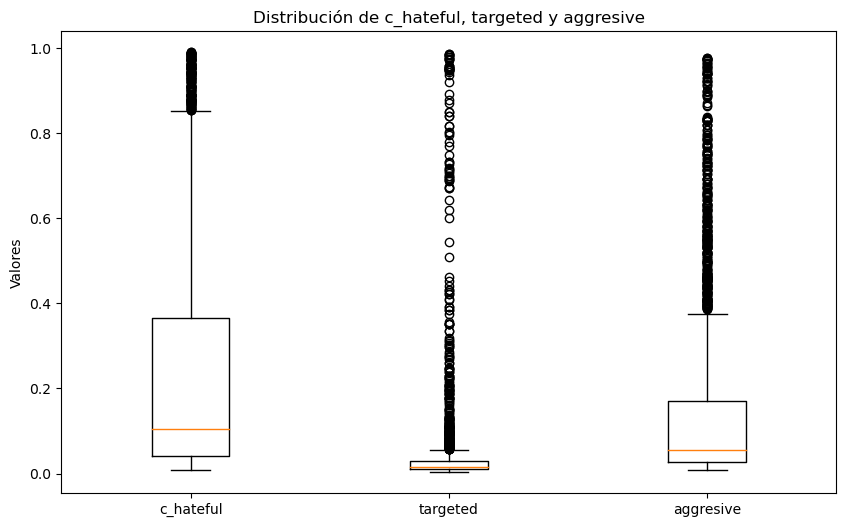

In [38]:
plt.figure(figsize=(10, 6))

plt.boxplot([c_hateful, targeted, aggresive], labels=['c_hateful', 'targeted', 'aggresive'])
plt.ylabel('Valores')
plt.title('Distribución de c_hateful, targeted y aggresive')

plt.show()

In [39]:
df_neg.to_csv('/Users/usuario/Downloads/irunela/csv/comentarios_negativos_territorio_ filtrados.csv')


Filtrar los neutros

In [6]:
df = pd.read_csv('/Users/usuario/Downloads/irunela/csv/comentarios_territorio_sentimiento.csv')

In [7]:
# Filtrar las filas donde 'sentiment' es igual a 0 =neutro
df_neutro = df[df['sentiment'] == 0]

# Seleccionar las columnas específicas que quieres conservar en el nuevo dataset
columnas_deseadas = ['video_id', 'author', 'comment', 'vectores_tfidf', 'comment_stem', 'sentiment']
df_neutro = df_neutro[columnas_deseadas].copy()

df_neutro.head()

,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
2,AsMZK3aGFHs,UCzQxKrGJNxaPv46W9qWIeBA,Tabarca te ha faltado,[0. 0. 0. ... 0. 0. 0.],tabarca faltado,0.0
5,AsMZK3aGFHs,UCGAXEDOzI7c2QaAeLLpNRbg,Si son de España son territorio de España. Con...,[0. 0. 0. ... 0. 0. 0.],espa territorio espa espa escuchar,0.0
8,AsMZK3aGFHs,UCGBHQoXnfajtCM1WHIhxTzg,''Provincia de Gerona'',[0. 0. 0. ... 0. 0. 0.],provincia gerona,0.0
9,AsMZK3aGFHs,UClazeL67GVCAtIneKf9lk4A,-Latino- sudamerica,[0. 0. 0. ... 0. 0. 0.],latino sudamerica,0.0
10,AsMZK3aGFHs,UCIGmrIv2ZNY98fs3Terwsvg,YO PIENSO QUE INJUSTA MENTE MARRUECOS 🇲🇦 QUIER...,[0. 0. 0. ... 0. 0. 0.],pienso injusta ment marrueco quier,0.0


In [8]:
df_neutro.to_csv('/Users/usuario/Downloads/irunela/csv/csv_neutro/comentarios_territorio_neutro.csv')

In [9]:
df_neutro = pd.read_csv('/Users/usuario/Downloads/irunela/csv/csv_neutro/comentarios_territorio_neutro.csv')
df_neutro

,Unnamed: 0,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
0,2,AsMZK3aGFHs,UCzQxKrGJNxaPv46W9qWIeBA,Tabarca te ha faltado,[0. 0. 0. ... 0. 0. 0.],tabarca faltado,0.0
1,5,AsMZK3aGFHs,UCGAXEDOzI7c2QaAeLLpNRbg,Si son de España son territorio de España. Con...,[0. 0. 0. ... 0. 0. 0.],espa territorio espa espa escuchar,0.0
2,8,AsMZK3aGFHs,UCGBHQoXnfajtCM1WHIhxTzg,''Provincia de Gerona'',[0. 0. 0. ... 0. 0. 0.],provincia gerona,0.0
3,9,AsMZK3aGFHs,UClazeL67GVCAtIneKf9lk4A,-Latino- sudamerica,[0. 0. 0. ... 0. 0. 0.],latino sudamerica,0.0
4,10,AsMZK3aGFHs,UCIGmrIv2ZNY98fs3Terwsvg,YO PIENSO QUE INJUSTA MENTE MARRUECOS 🇲🇦 QUIER...,[0. 0. 0. ... 0. 0. 0.],pienso injusta ment marrueco quier,0.0
...,...,...,...,...,...,...,...
5853,10314,O2OYcNT8TQg,UCK6AfHIi9UiRkdNLJn3lk1A,Me pregunto porque las mujeres no se masturban...,[0. 0. 0. ... 0. 0. 0.],pregunto mujer masturban misma,0.0
5854,10316,O2OYcNT8TQg,UCpOcODussAbRHeOpr_jF8BQ,El clítoris tiene orificio?,[0. 0. 0. ... 0. 0. 0.],tori orificio,0.0
5855,10320,_4WGKLXSsfo,UCCVICtpqlhnmcvnM57q-zmA,Bom filme 😊,[0. 0. 0. ... 0. 0. 0.],film,0.0
5856,10321,_4WGKLXSsfo,UCV7TS0re9PSDk_w_E64j3GQ,"Próximamente subtítulos en español, ya comencé...",[0. 0. 0. ... 0. 0. 0.],ximament subt tulo espa comenc hacerlo,0.0


In [14]:
df_neutro['hateful'] = df_neutro['comment_stem'].apply(lambda x: hateful(x))

In [15]:
df_neutro['targeted'] = df_neutro['comment_stem'].apply(lambda x: targeted(x))

In [16]:
df_neutro['aggresive'] = df_neutro['comment_stem'].apply(lambda x: aggresive(x))

In [17]:
#defino los valores de mas de 0.5 en hateful 
hateful_mayor_05 = df_neutro[df_neutro['hateful'] > 0.5]

In [18]:
len(hateful_mayor_05)

296

In [22]:
# Concatenar los DataFrames df_neutro y hateful_mayor_05
df_hate_territorio = pd.concat([df_neutro, hateful_mayor_05], ignore_index=True)


In [23]:
df_hate_territorio = df_hate_territorio.drop([ 'Unnamed: 0'], axis=1)

In [24]:
df_hate_territorio.to_csv('/Users/usuario/Downloads/irunela/csv/csv_hate/hate_territorio.csv')

In [25]:
df_hate_territorio.shape

(6154, 9)